#### DOMAIN: Telecom
#### CONTEXT: 
A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.
#### DATA DESCRIPTION: 
Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about: <br>
• Customers who left within the last month – the column is called Churn <br>
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies <br>
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges <br>
• Demographic info about customers – gender, age range, and if they have partners and dependents <br>
#### PROJECT OBJECTIVE: 
Build a model that will help to identify the potential customers who have a higher probability to churn. 
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising 
customer retention.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


1. <strong>Import and warehouse data:</strong> <br>
• Import all the given datasets. Explore shape and size. <br>
• Merge all datasets onto one and explore final shape and size.

In [2]:
churnData = pd.read_csv("TelcomCustomer-Churn.csv")
print("Shape of TelcomCustomer-Churn dataset: ", churnData.shape)
churnData.head(5)

Shape of TelcomCustomer-Churn dataset:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn1Data = pd.read_csv("TelcomCustomer-Churn_1.csv")
print("Shape of TelcomCustomer-Churn_1 dataset: ", churn1Data.shape)
churn1Data.head(5)

Shape of TelcomCustomer-Churn_1 dataset:  (7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [4]:
churn2Data = pd.read_csv("TelcomCustomer-Churn_2.csv")
print("Shape of TelcomCustomer-Churn_2 dataset: ", churn2Data.shape)
churn2Data.head()

Shape of TelcomCustomer-Churn_2 dataset:  (7043, 11)


,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Here, we can notice that TelcomCustomer-Churn.csv contains columns from other two datasets and we need not have to merge dataset. The number of rows in all the three datasets is also equal.

### 2. Data cleansing: 
• Missing value treatment <br>
• Convert categorical attributes to continuous using relevant functional knowledge <br>
• Drop attribute/s if required using relevant functional knowledge <br>
• Automate all the above steps

In [5]:
churnData.duplicated().sum()

0

In [6]:
churnData.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

   ##### There is no  null or missing values into this Dataset. But there might be the possibility that there is any inappropriate value. Lets check further for it.

In [7]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### In above statistical anaysis TotalCharges Column is not present. And later we got to know that its Datatype is also Object which is not appropriate for a column containing numbers.
##### It certainly do not contain ay null value.
##### So, there might be some value which is not a number and not null.

In [9]:


churnData = (churnData.drop('TotalCharges', axis=1).join(churnData['TotalCharges'].apply(pd.to_numeric, errors='coerce')))

##### With above code, We droped the TotalCharges column and again joined them after applying pd.to_numeric to convert all the non numeric data into NaN.
##### Let's do describe and info to check the datatype of Total Charges column now

In [10]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
churnData.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
Churn                0
TotalCharges        11
dtype: int64

In [12]:
churnData.dropna(axis=0, inplace=True)

##### After converting non numeric into NaN vaues in TotalCharges Column. As the number of NaNs was very low we dropped the rows containing NaN values.

In [13]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


###  Convert categorical attributes to continuous using relevant functional knowledge

In [14]:
for column in churnData.columns:
    if churnData[column].dtype == 'object':
        churnData[column] = pd.Categorical(churnData[column])
        
churnData.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,820.50
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,No,1949.40
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,No,301.90
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,3046.05
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,No,3487.95


In [15]:
churnData_Copy = churnData

In [16]:
print(churnData.gender.value_counts())
print(churnData.Partner.value_counts())
print(churnData.Dependents.value_counts())
print(churnData.PhoneService.value_counts())
print(churnData.MultipleLines.value_counts())
print(churnData.InternetService.value_counts())
print(churnData.OnlineSecurity.value_counts())
print(churnData.OnlineBackup.value_counts())
print(churnData.DeviceProtection.value_counts())
print(churnData.TechSupport.value_counts())
print(churnData.StreamingTV.value_counts())
print(churnData.StreamingMovies.value_counts())
print(churnData.Contract.value_counts())
print(churnData.PaperlessBilling.value_counts())
print(churnData.PaymentMethod.value_counts())
#print(churnData.TotalCharges.value_counts())
print(churnData.Churn.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV

In [17]:
replaceStruct = {
                "Partner": {"No": 0, "Yes": 1},
                "Dependents": {"No": 0, "Yes":1},
                "PhoneService": {"No": 0, "Yes":1},
                "PaperlessBilling": {"No": 0, "Yes": 1},
                "Churn": {"No": 0, "Yes": 1 }
                } 

oneHotCols=["gender","MultipleLines","InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection",
           "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

In [18]:
churnData = churnData.replace(replaceStruct)
churnData = pd.get_dummies(churnData, columns=oneHotCols)

churnData.head(5)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,0,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,0,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,1,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,0,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,1,151.65,...,1,0,0,1,0,0,0,0,1,0


### Drop attribute/s if required using relevant functional knowledge

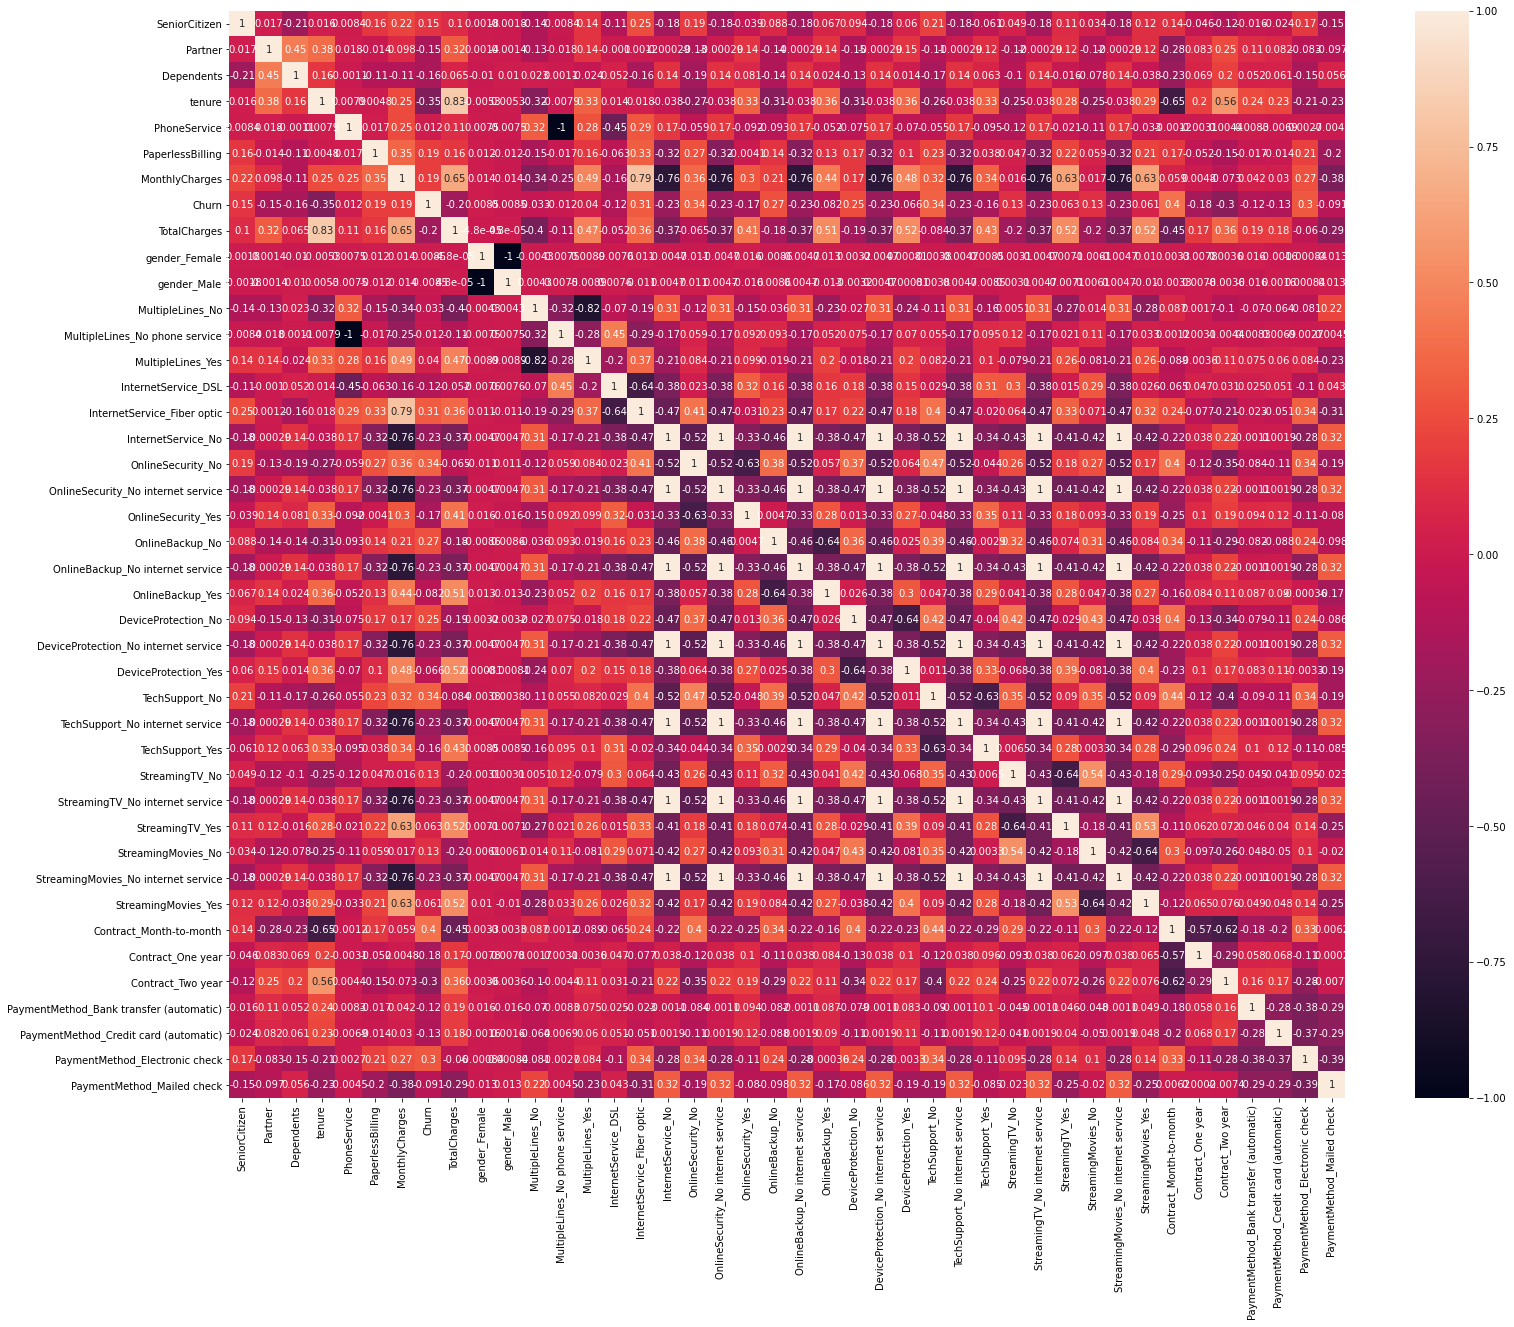

In [19]:
plt.figure(figsize=(25,20))
sns.heatmap(churnData.corr(), annot=True);

##### We can drop below columns as they are highy related to the coumn InternetService_No:
<ul>
    <li>OnlineSecurity_No internet service</li>
    <li>OnlineBackup_No internet service</li>
    <li>DeviceProtection_No internet service</li>
    <li>TechSupport_No internet service</li>
    <li>StreamingTV_No internet service</li>
    <li>MultipleLines_No phone service</li>
    <li>StreamingMovies_No internet service</li>
</ul>

##### Apart from above columns we can also drop customerId as it is of no use
##### We can drop InternetService_DSL, Contract_One Year, PaymentMethod_Mailed Check to remove MultiCollinearity

In [20]:
churnData = churnData.drop(['OnlineSecurity_No internet service',
                           'OnlineBackup_No internet service',
                           'DeviceProtection_No internet service',
                           'TechSupport_No internet service',
                           'StreamingTV_No internet service',
                           'StreamingMovies_No internet service',
                            'MultipleLines_No phone service',
                            'InternetService_DSL',
                            'Contract_One year',
                            'PaymentMethod_Mailed check',
                           'customerID'],axis=1)

In [21]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   MonthlyCharges                           7032 non-null   float64
 7   Churn                                    7032 non-null   int64  
 8   TotalCharges                             7032 non-null   float64
 9   gender_Female                            7032 non-null   uint8  
 10  gender_Male                              7032 no

### 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data. <br>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [22]:
churnData.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,TotalCharges,gender_Female,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,0.265785,2283.300441,0.495307,...,0.290102,0.399460,0.384386,0.395478,0.388367,0.551052,0.239619,0.219283,0.216297,0.336320
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,0.441782,2266.771362,0.500014,...,0.453842,0.489822,0.486484,0.488988,0.487414,0.497422,0.426881,0.413790,0.411748,0.472483
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.000000,18.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,0.000000,401.450000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000,1397.475000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,1.000000,3794.737500,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,8684.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
pd.crosstab([churnData_Copy.InternetService, churnData_Copy.Contract], churnData_Copy.Churn, margins=True, margins_name='Total')

Churn                             No   Yes  Total
InternetService Contract                         
DSL             Month-to-month   829   394   1223
                One year         517    53    570
                Two year         611    12    623
Fiber optic     Month-to-month   966  1162   2128
                One year         435   104    539
                Two year         398    31    429
No              Month-to-month   425    99    524
                One year         354     9    363
                Two year         628     5    633
Total                           5163  1869   7032

##### 1. From the above crosstab we can say that the customer having Month-to-Month contract churn more than the customers having One/Two years of contracts.
##### 2. We can also notice that customers who have opted for FiberOptics has churned more compared to other internet service. We need to carry out survey for service satisfaction from which we can deduce what are the resons due to which customers like/unlike fiberoptic or any particular service

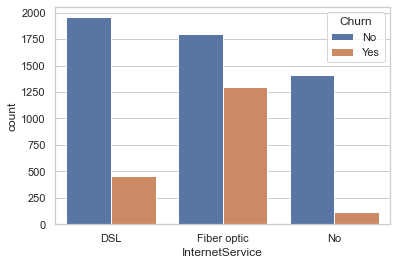

In [24]:
# Visual justification for second point
sns.set(style="whitegrid", color_codes=True)

sns.countplot(data=churnData_Copy, x=churnData_Copy.InternetService, hue='Churn');

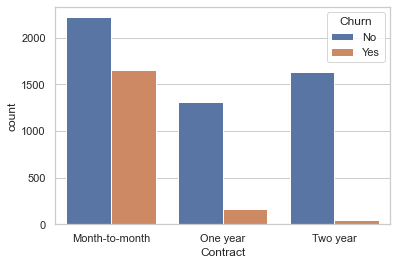

In [25]:
sns.countplot(data=churnData_Copy, x=churnData_Copy.Contract, hue='Churn');

In [26]:
pd.crosstab([churnData_Copy.PhoneService, churnData_Copy.InternetService], churnData_Copy.Churn, margins=True, margins_name='Total')

Churn                           No   Yes  Total
PhoneService InternetService                   
No           DSL               510   170    680
Yes          DSL              1447   289   1736
             Fiber optic      1799  1297   3096
             No               1407   113   1520
Total                         5163  1869   7032

##### 1. From the above crosstab we can say that the company's DSL service is good as compared to Fiber Optic as the number of churners from DSL category is much less then with Fiber Optic.


### 4. Data pre-processing:
• Segregate predictors vs target attributes<br>
• Check for target balancing and fix it if found imbalanced.<br>
• Perform train-test split.<br>
• Check if the train and test data have similar statistical characteristics when compared with original data.<br>

In [27]:
#Segregate predictors vs target attributes

X = churnData.drop('Churn', axis=1)
y = churnData['Churn']

In [28]:
print("Original X data: {0} ({1:0.2f}%)".format(len(X), (len(X)/len(churnData)) * 100))
print("Original Y data: {0} ({1:0.2f}%)".format(len(y), (len(y)/len(churnData)) * 100))
print("")

print("Original Churn Yes Values    : {0} ({1:0.2f}%)".format(len(churnData.loc[churnData['Churn'] == 1]), (len(churnData.loc[churnData['Churn'] == 1])/len(churnData.index)) * 100))
print("Original Churn No Values   : {0} ({1:0.2f}%)".format(len(churnData.loc[churnData['Churn'] == 0]), (len(churnData.loc[churnData['Churn'] == 0])/len(churnData.index)) * 100))
print("")


Original X data: 7032 (100.00%)
Original Y data: 7032 (100.00%)

Original Churn Yes Values    : 1869 (26.58%)
Original Churn No Values   : 5163 (73.42%)



In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
print("Training X data: {0} ({1:0.2f}%)".format(len(X_train), (len(X_train)/len(churnData)) * 100))
print("Training Y data: {0} ({1:0.2f}%)".format(len(y_train), (len(y_train)/len(churnData)) * 100))
print("")

print("Training Churn Yes Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Churn No Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

print("Testing X data: {0} ({1:0.2f}%)".format(len(X_test), (len(X_test)/len(churnData)) * 100))
print("Testing Y data: {0} ({1:0.2f}%)".format(len(y_test), (len(y_test)/len(churnData)) * 100))
print("")

print("Training Churn Yes Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Training Churn No Values   : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training X data: 4922 (69.99%)
Training Y data: 4922 (69.99%)

Training Churn Yes Values    : 1314 (26.70%)
Training Churn No Values   : 3608 (73.30%)

Testing X data: 2110 (30.01%)
Testing Y data: 2110 (30.01%)

Training Churn Yes Values    : 555 (26.30%)
Training Churn No Values   : 1555 (73.70%)



##### We can see that the statistical characteritics remains same after splitiing the data into training and test

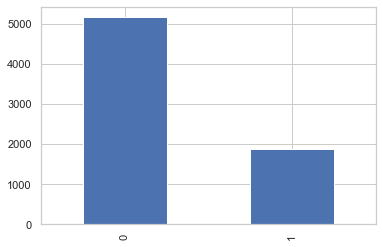

In [31]:
y.value_counts().plot(kind = 'bar');

##### The target is highly imbalanced. Lets split the data into train and test and then will try to balance it

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y= smote.fit_resample(X, y)

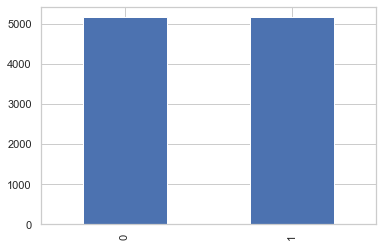

In [34]:

y.value_counts().plot(kind = 'bar');

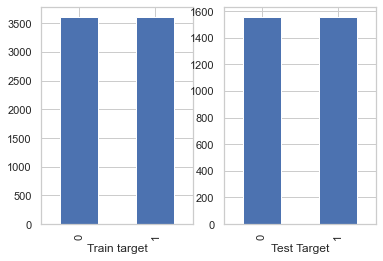

In [36]:

X_train, y_train= smote.fit_resample(X_train, y_train)
X_test, y_test= smote.fit_resample(X_test, y_test)

plt.subplot(1,2,1)
plt.xlabel('Train target')
y_train.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
plt.xlabel('Test Target')
y_test.value_counts().plot(kind = 'bar')
plt.show();




### 5. Model training, testing and tuning:
1. Train and test all ensemble models taught in the learning module. <br>
2. Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.<br>
3. Display the classification accuracies for train and test data.<br>
4. Apply all the possible tuning techniques to train the best model for the given data. <br>
5. Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. <br>
6. Display and compare all the models designed with their train and test accuracies. <br>
7. Select the final best trained model along with your detailed comments for selecting this model. <br>
8. Pickle the selected model for future use<br>

## Build Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [38]:
print("Score with training data: {0:0.2f}".format(dTree.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(dTree.score(X_test,y_test)))

Score with training data: 1.00
Score with testing data: 0.76


##### Score with testing data is 76%. Let regularize the data by reducing overfitting

## Reducing over fitting (Regularization)

In [51]:
dTreeR = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=4)
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [52]:
print("Score with training data: {0:0.2f}".format(dTreeR.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(dTreeR.score(X_test,y_test)))

Score with training data: 0.78
Score with testing data: 0.78


##### By reducing the overfitting to 6th level, we are able to achieve 78% of accuracy.

## Visualizing the Decision Tree

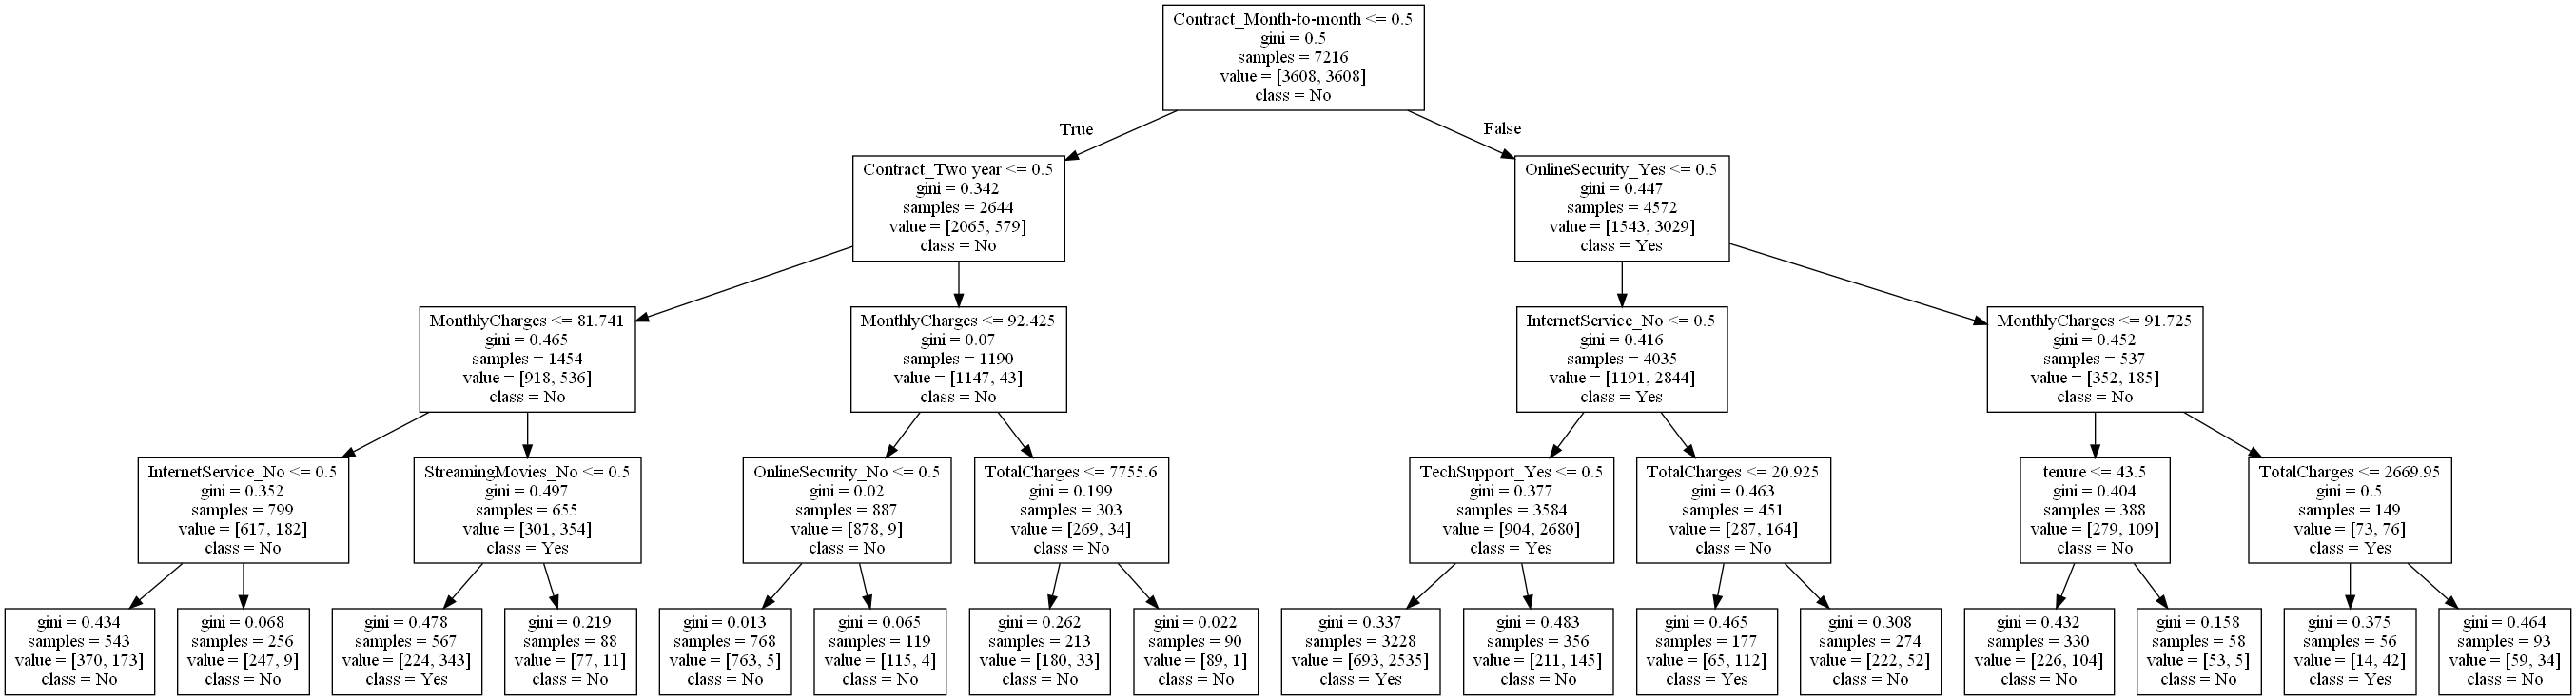

In [53]:
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image

train_char_label = ['No', 'Yes']
Churn_Tree_File = open('churn_tree.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Churn_Tree_File.close()



#Works only if "dot" command works on you machine

retCode = system("dot -Tpng churn_tree.dot -o churn_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("churn_tree.png"))

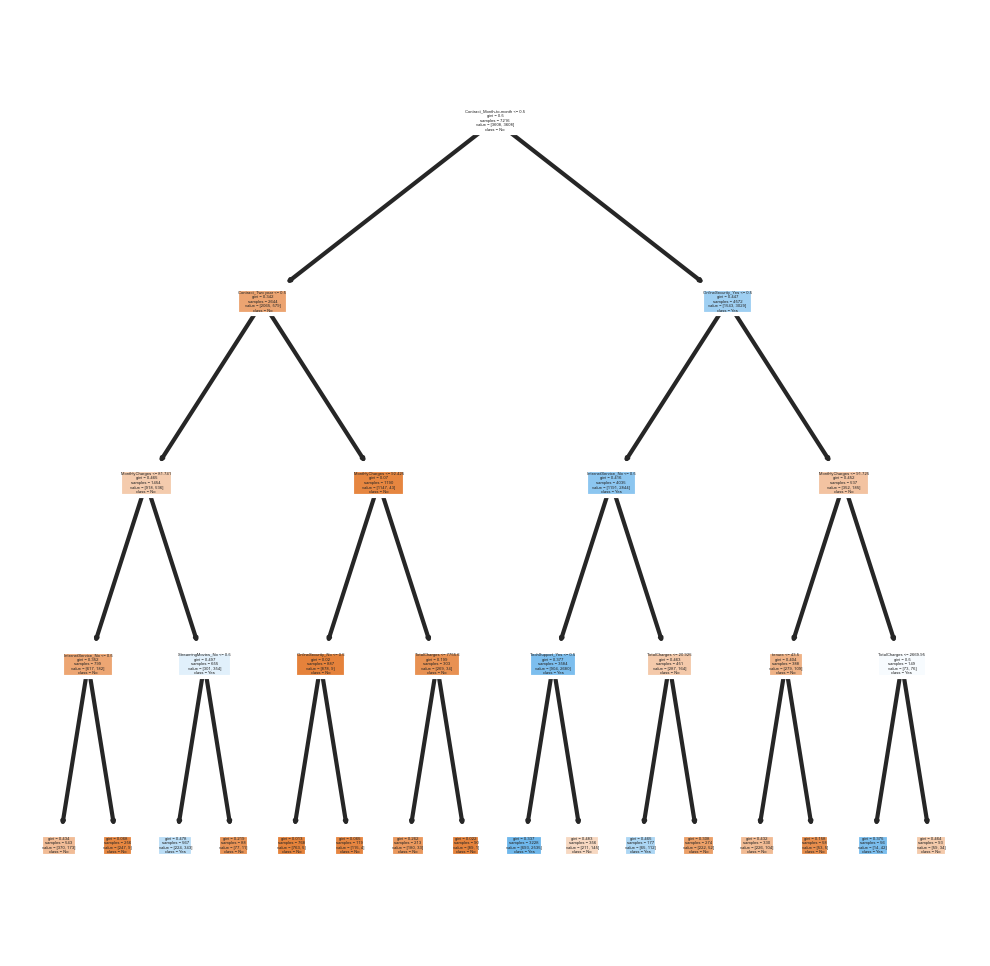

In [55]:
# If graphviz doesn't work, we can use plot_tree method from sklearn.tree
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
tenure                                   0.003840
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.064152
TotalCharges                             0.040956
gender_Female                            0.000000
gender_Male                              0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.108550
OnlineSecurity_No                        0.000112
OnlineSecurity_Yes                       0.091389
OnlineBackup_No                          0.000000
OnlineBackup_Yes                         0.000000
DeviceProtection_No                      0.000000


##### Contract_Month-to-month has more importance in building the decision tree to find whether the customer wil churn or not

0.7845659163987139


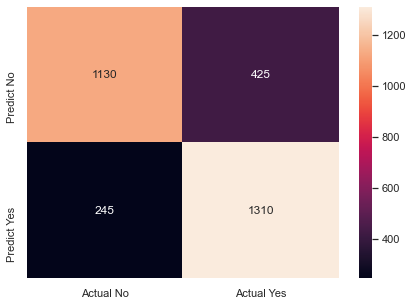

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Predict No","Predict Yes"]],
                  columns = [i for i in ["Actual No","Actual Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

#                             Ensemble Learning - Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier

bgCL = BaggingClassifier(base_estimator=dTree, n_estimators=25, random_state=1)
bgCL.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=25, random_state=1)

In [59]:
print("Score with training data: {0:0.2f}".format(bgCL.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(bgCL.score(X_test,y_test)))

Score with training data: 1.00
Score with testing data: 0.82


##### With Bagging ensemble technique we were able to get 82% of accuracy with this model.

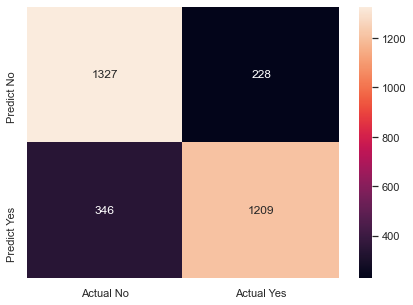

In [61]:
y_predict = bgCL.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Predict No","Predict Yes"]],
                  columns = [i for i in ["Actual No","Actual Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

# Ensemble Learning - AdaBoosting

In [62]:
from sklearn.ensemble import AdaBoostClassifier

abCL = AdaBoostClassifier(random_state=1, n_estimators=30)
abCL.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=1)

In [63]:
print("Score with training data: {0:0.2f}".format(abCL.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(abCL.score(X_test,y_test)))

Score with training data: 0.83
Score with testing data: 0.83


##### With AdaBoosting ensemble technique we were able to get 83% of accuracy with this model.

0.8282958199356913


<AxesSubplot:>

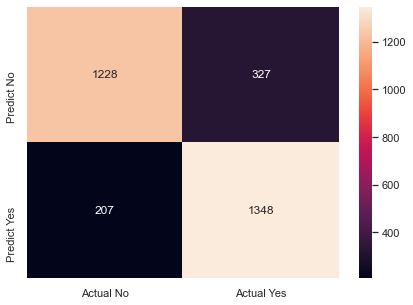

In [64]:
y_predict = abCL.predict(X_test)
print(abCL.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Predict No","Predict Yes"]],
                  columns = [i for i in ["Actual No","Actual Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#                     Ensemble Learning - GradientBoost

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbCl = GradientBoostingClassifier(random_state=1)
gbCl.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [66]:
print("Score with training data: {0:0.2f}".format(gbCl.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(gbCl.score(X_test,y_test)))


Score with training data: 0.87
Score with testing data: 0.85


##### With GradientBoosting ensemble technique we were able to get 85% of accuracy with this model.

0.8491961414790997


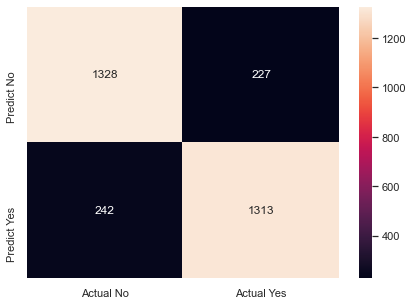

In [67]:
y_predictGB = gbCl.predict(X_test)
print(gbCl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predictGB,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Predict No","Predict Yes"]],
                  columns = [i for i in ["Actual No","Actual Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

# Ensemble RandomForest Classifier/

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfCL = RandomForestClassifier(random_state=1, criterion='entropy')
rfCL.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [69]:
print("Score with training data: {0:0.2f}".format(rfCL.score(X_train,y_train)))
print("Score with testing data: {0:0.2f}".format(rfCL.score(X_test,y_test)))

Score with training data: 1.00
Score with testing data: 0.83


##### With RandomTree Classifier ensemble technique we were able to get 8% of accuracy with this model.

0.8289389067524116


<AxesSubplot:>

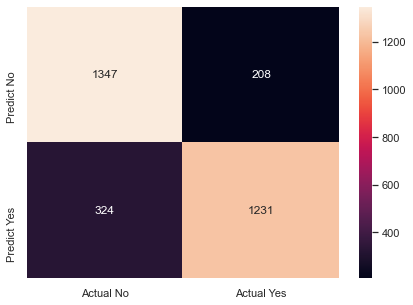

In [70]:
y_predict = rfCL.predict(X_test)
print(rfCL.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Predict No","Predict Yes"]],
                  columns = [i for i in ["Actual No","Actual Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Classification report for Gradient Boost Ensemble

In [71]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_predictGB)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1555
           1       0.85      0.84      0.85      1555

    accuracy                           0.85      3110
   macro avg       0.85      0.85      0.85      3110
weighted avg       0.85      0.85      0.85      3110



##### I am selecting GradientBoosting Ensemble technique as it gies the best accuracy score of 85% and out-performing rest of the models

### 6. Conclusion and improvisation:
• Write your conclusion on the results. <br>
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
telecom operator to perform a better data analysis in future

##### 1. The data is highly imbalanced. 
##### 2. There should have been columns like MONTHLY USAGE for the services opted by the customer, CALL MINUTES, etc. And with the help of these columns we could have estimated whether customers use the service or not. if not they might churn.
##### 3. There is not much of null values which is good.
##### 4. Company's Fibre Optic might not be optimal as customers opted for that service are churning or greater numbers comparitively.
##### 5. Out of all the ensemble techniques Gradient Boosting technique is out performing others.
##### 6. Contract_Month-to-month is an important feature in building decision tree in this case study.
##### 7. There was no need for proiding TelecomCustomer-Churn_1 and TelecomCustomer-Churn_2 dataset as TelecomCustomer-Churn has columns from both the other datasets